# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



## Goal
Goal is to predict if the client will subscribe a term deposit (variable y).

### Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?

In [2]:
# connect to google drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [35]:
import pandas as pd
from imblearn.over_sampling import SMOTE
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
import sklearn.pipeline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt
import time
from sklearn.feature_selection import RFE

In [4]:
df = pd.read_csv('/content/drive/MyDrive/Berkeley/module_17/bank-additional-full.csv', sep = ';')

In [5]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [6]:
df.sample(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
20406,33,technician,married,professional.course,no,no,no,cellular,aug,tue,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no
19262,52,technician,married,professional.course,unknown,no,no,cellular,aug,wed,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.967,5228.1,no
16552,44,technician,married,professional.course,no,no,no,cellular,jul,wed,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.963,5228.1,no
32512,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
19509,29,technician,single,professional.course,no,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.968,5228.1,no


### 2 Exploratory Data Analysis

In [7]:
# Get info about dataset.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [8]:
# Get stats
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [9]:

# Check for missing values.
df.isnull().sum()[df.isnull().sum() > 0]

,0


### 2.1 Univariate analysis

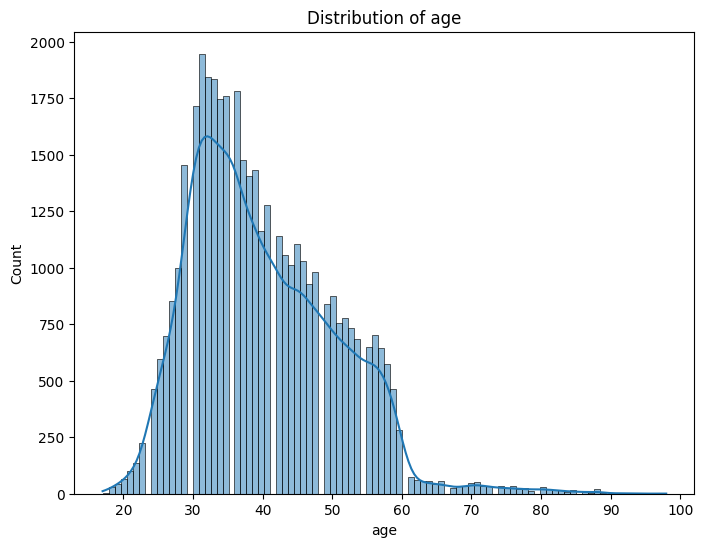

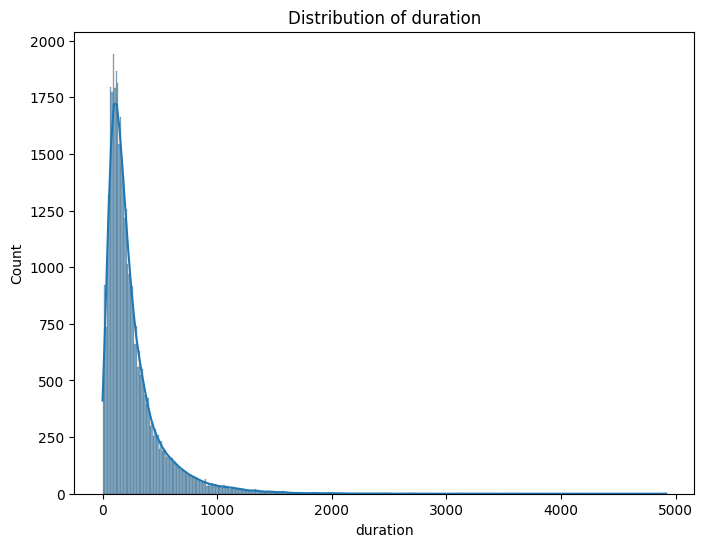

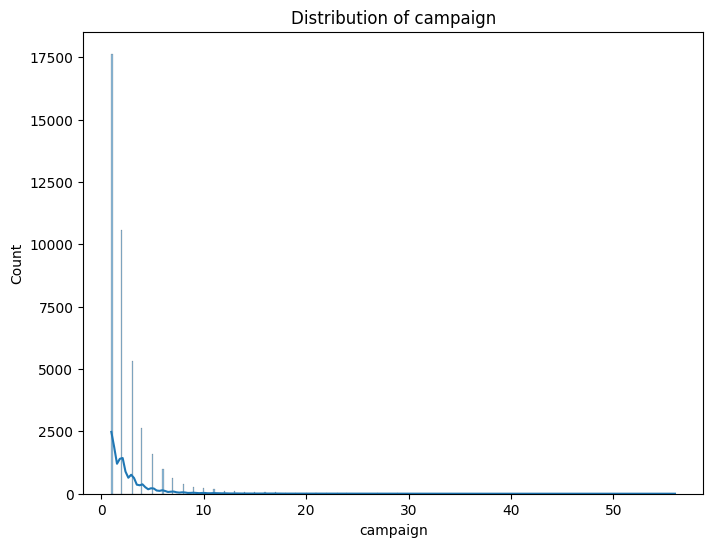

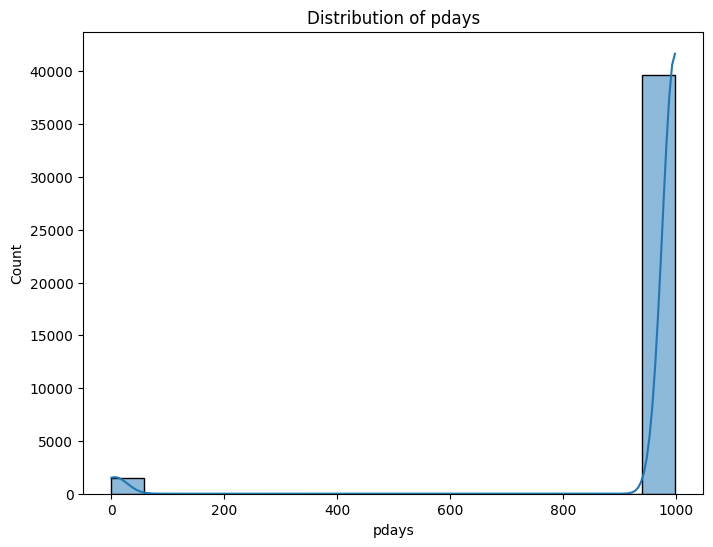

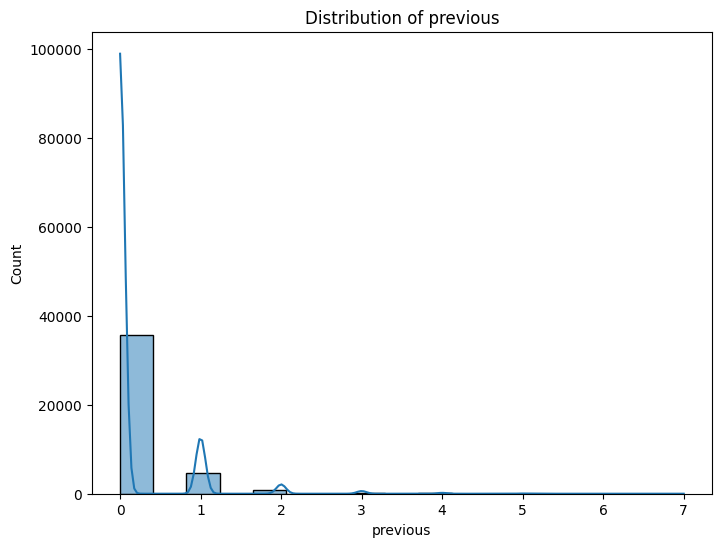

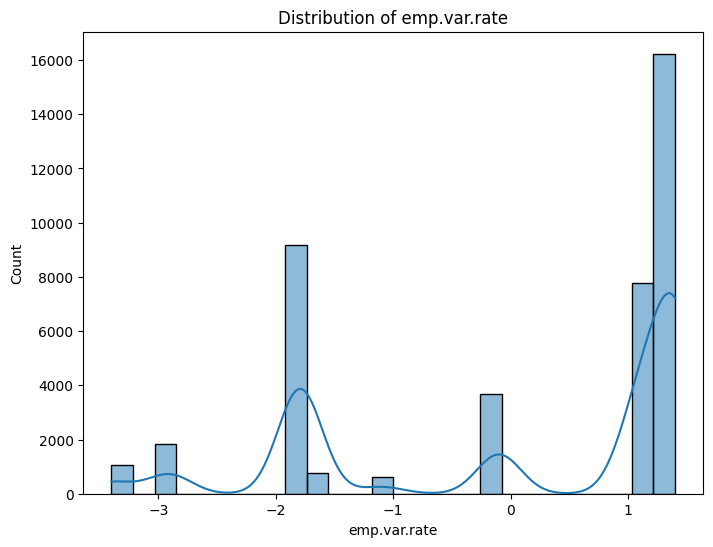

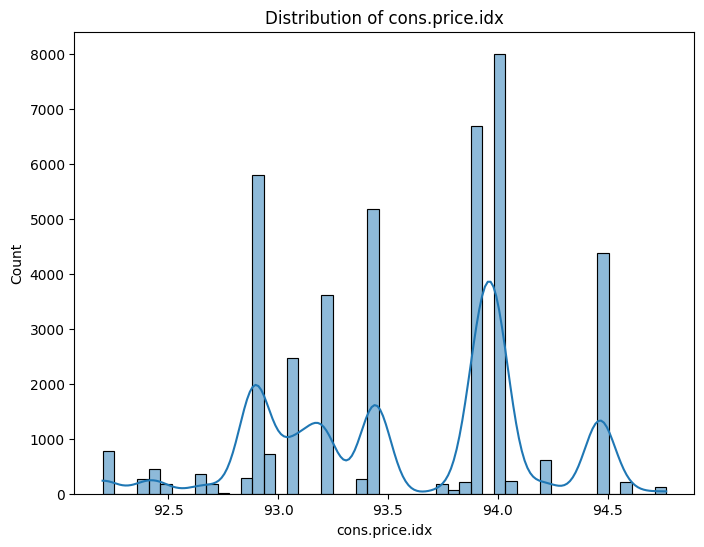

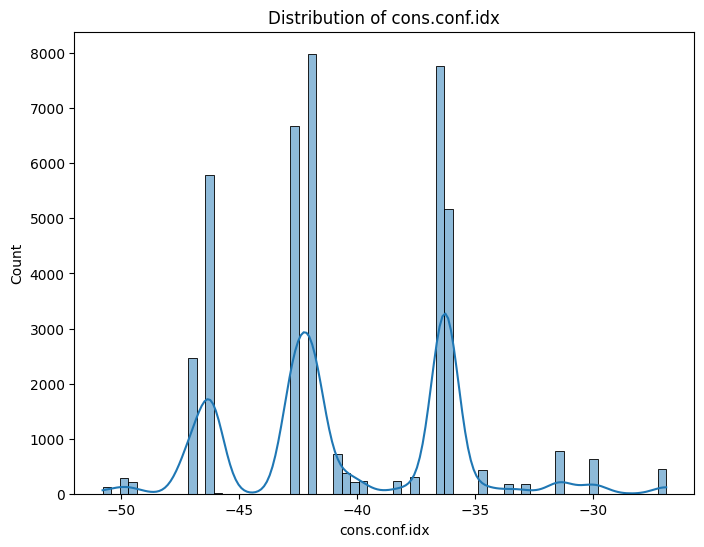

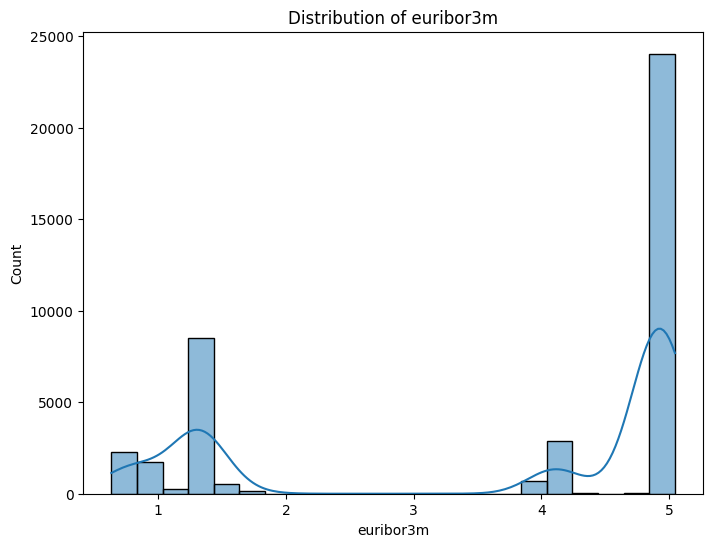

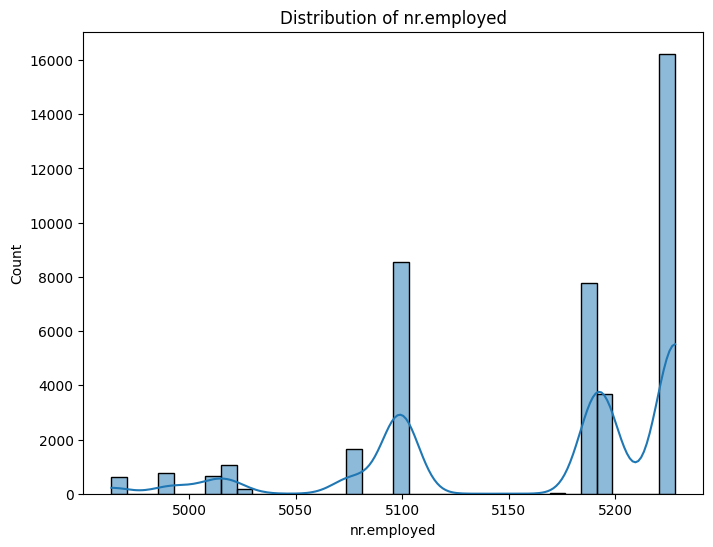

In [10]:
for col in df.select_dtypes(include=['number']).columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[col], kde=True)  # kde adds a kernel density estimate
    plt.title(f'Distribution of {col}')
    plt.show()

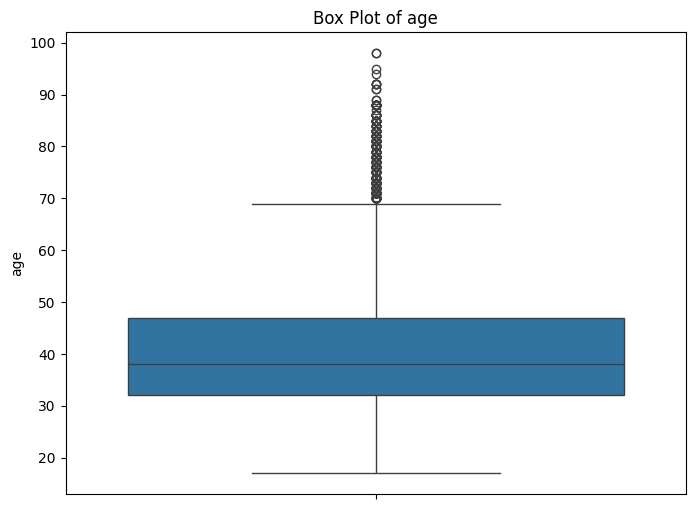

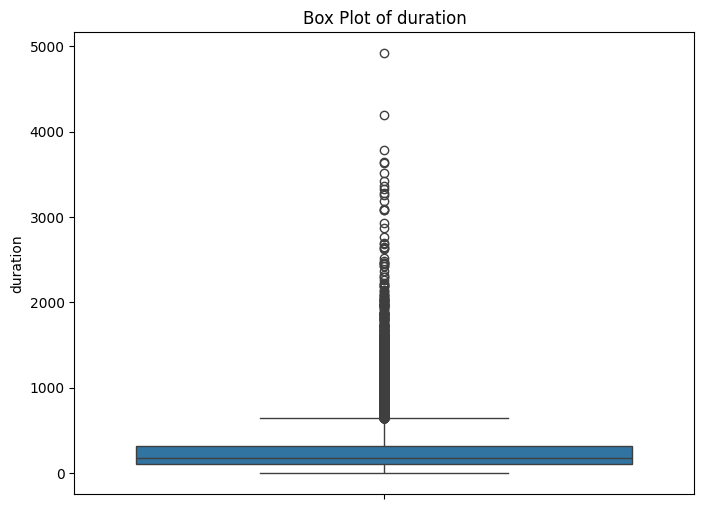

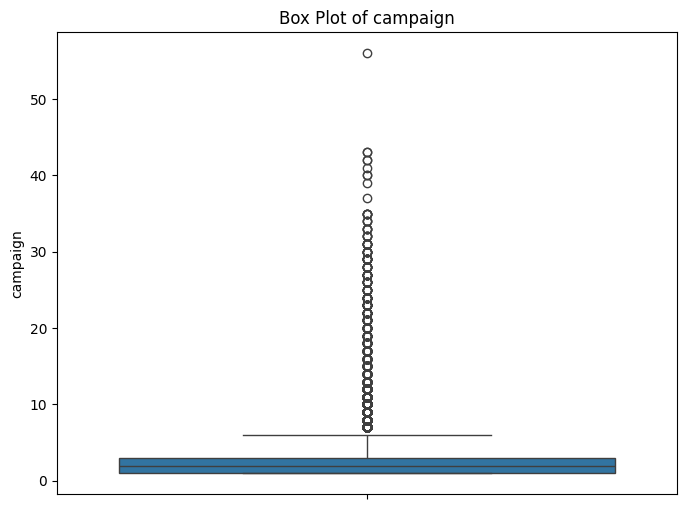

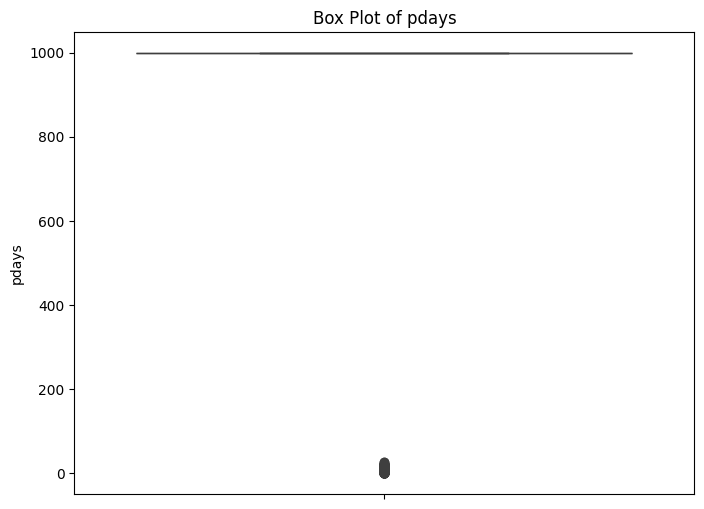

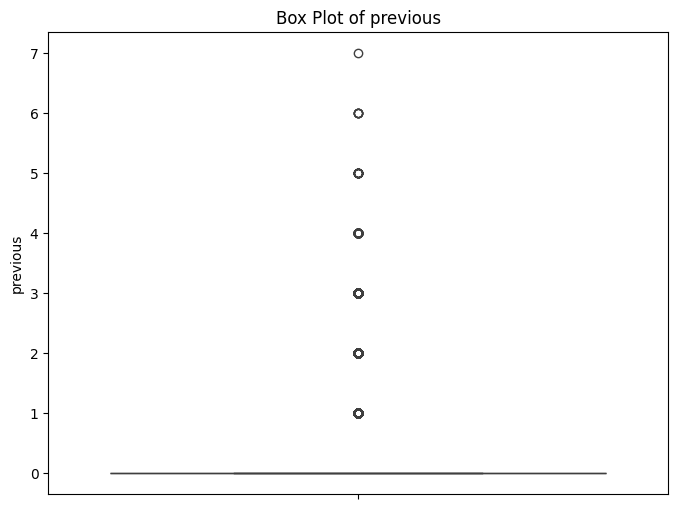

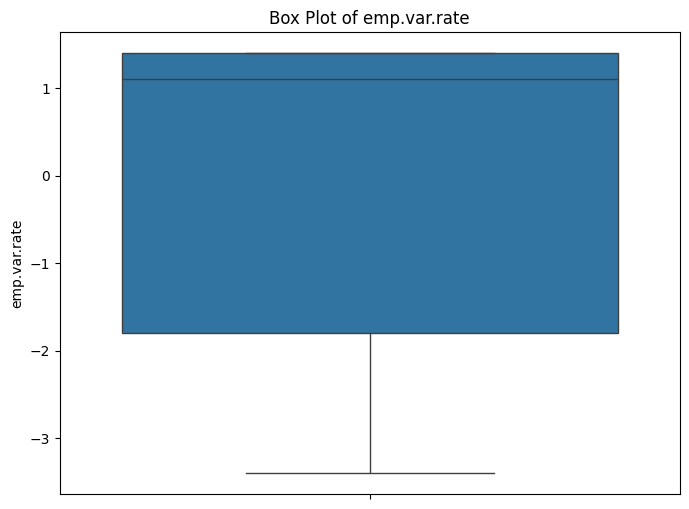

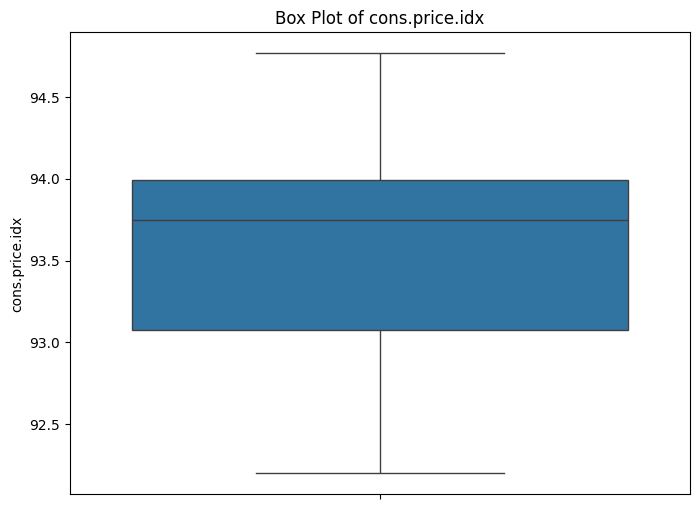

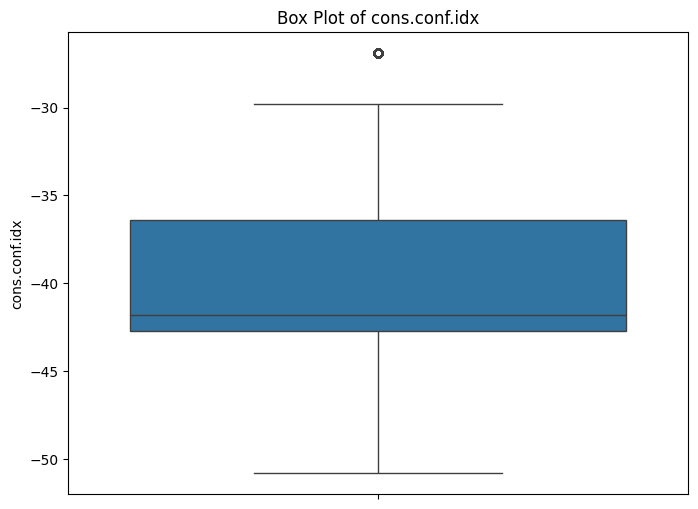

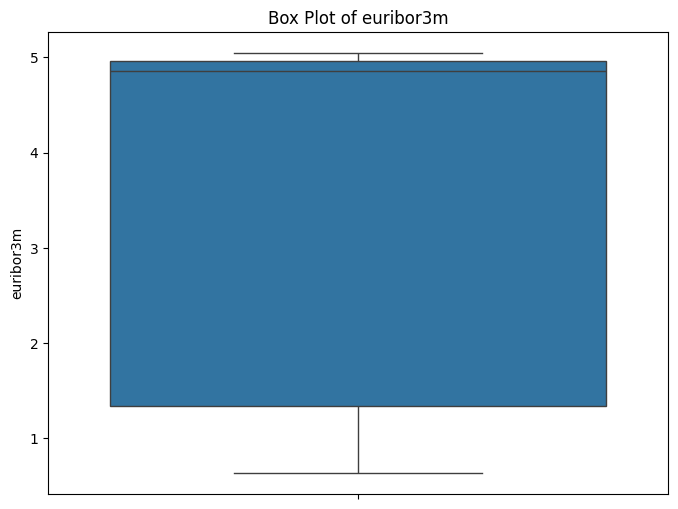

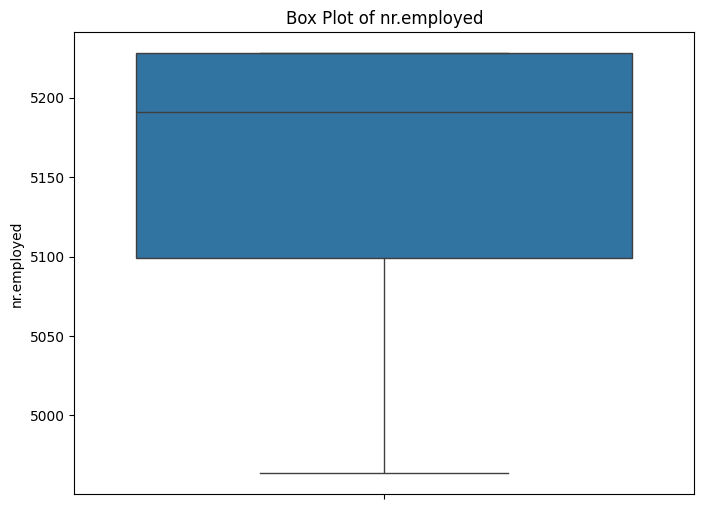

In [11]:
# Box plots
for col in df.select_dtypes(include=['number']).columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(y=df[col])
    plt.title(f'Box Plot of {col}')
    plt.show()

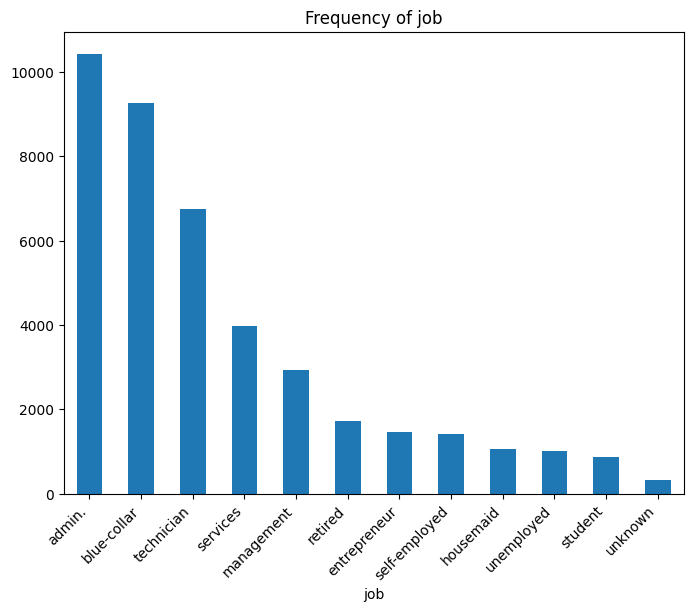

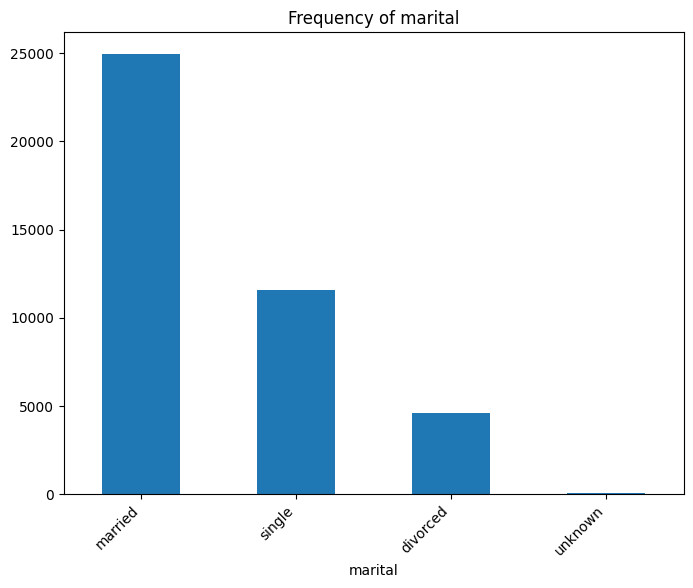

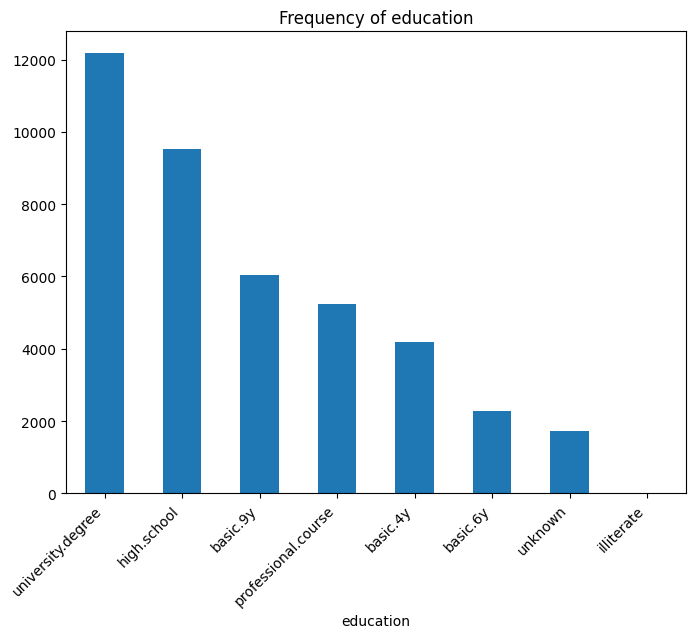

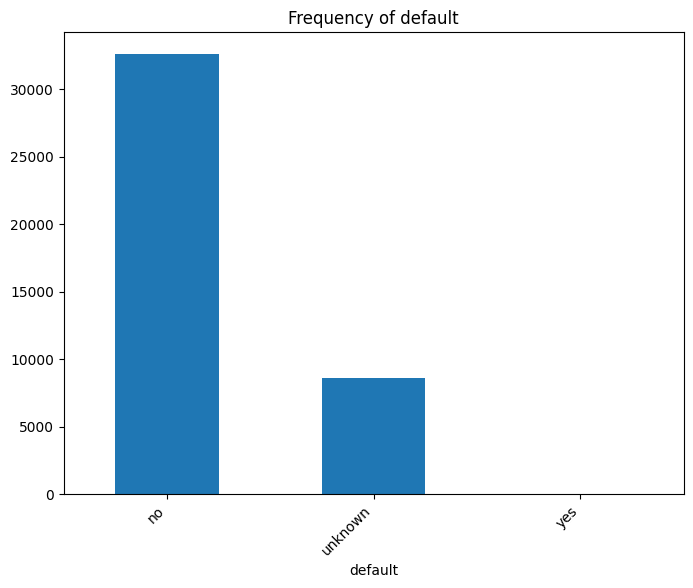

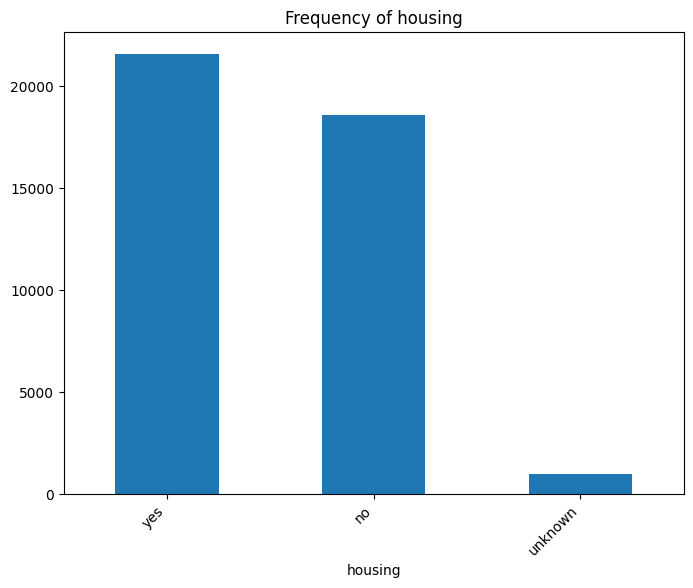

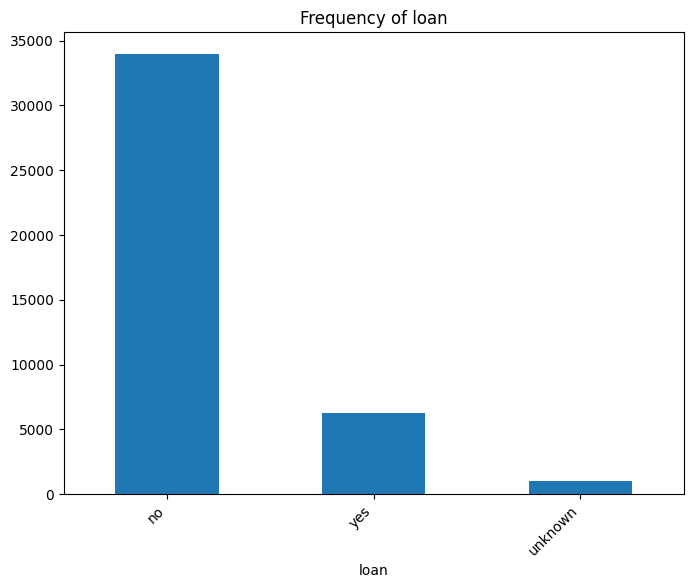

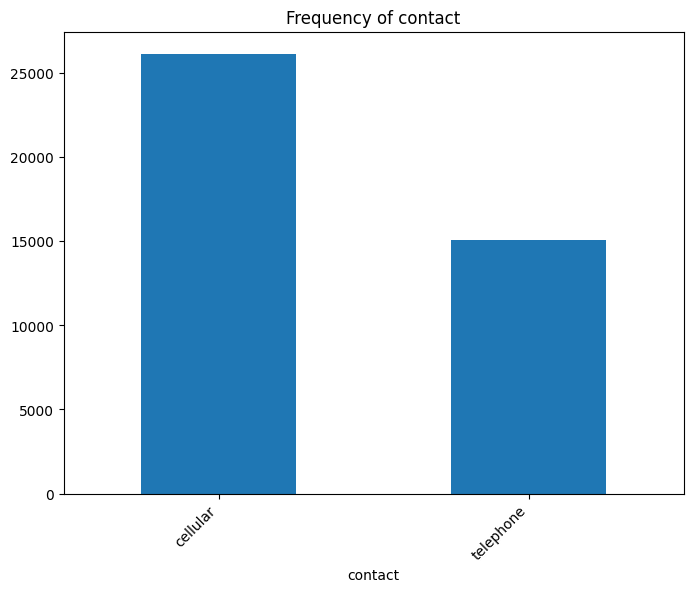

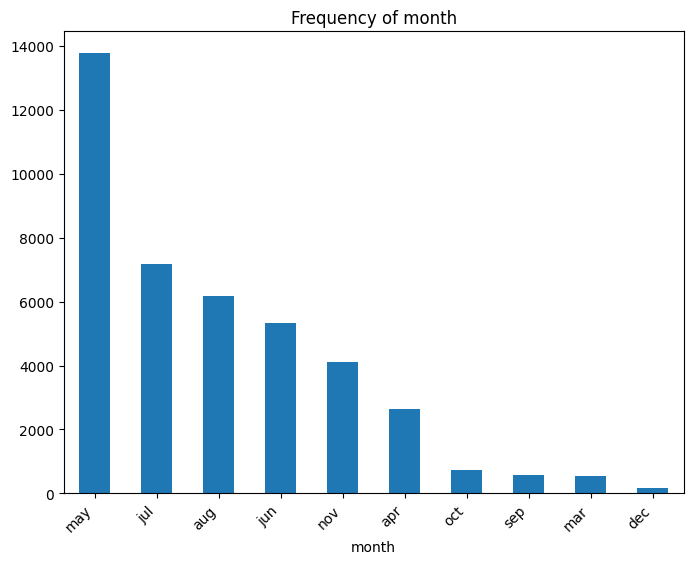

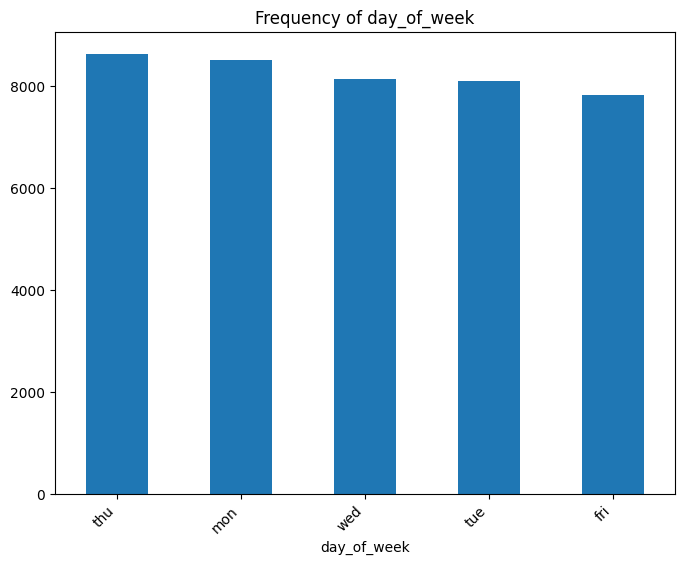

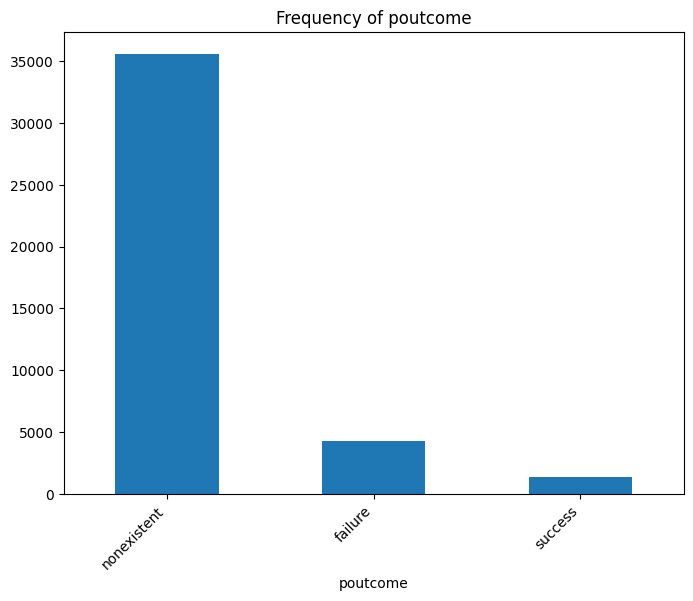

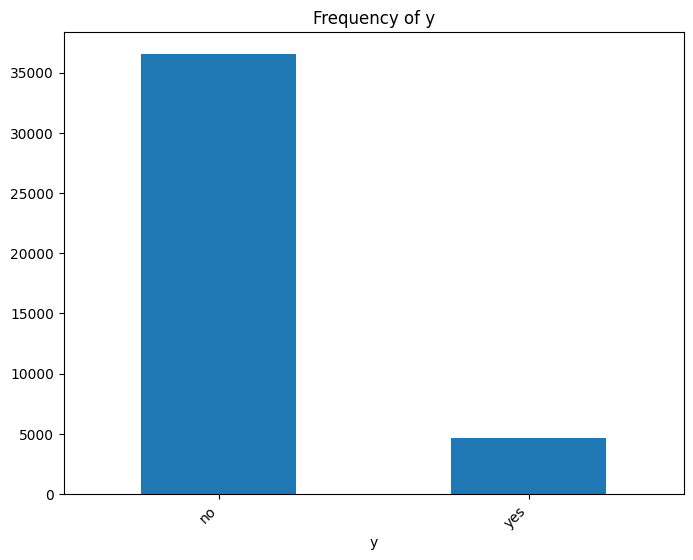

In [12]:
# For categorical features:
# Bar charts
for col in df.select_dtypes(include=['object']).columns:
    plt.figure(figsize=(8, 6))
    df[col].value_counts().plot(kind='bar')
    plt.title(f'Frequency of {col}')
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
    plt.show()

### Categorical vs. Categorical:


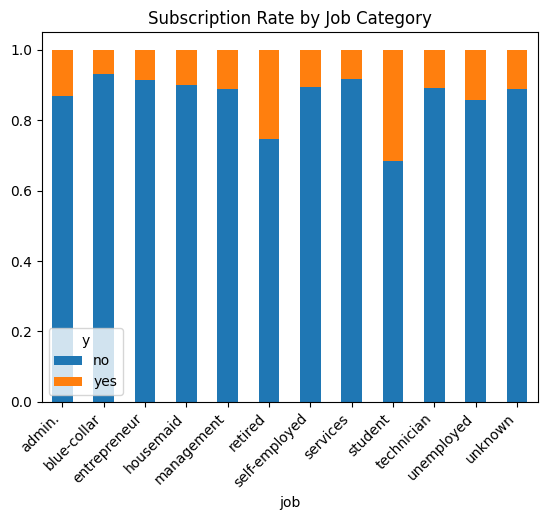

In [13]:
# Crosstabs (Contingency Tables)
pd.crosstab(df['education'], df['y'])

# Stacked bar charts
# Example: Subscription rate by job category
job_subscription = pd.crosstab(df['job'], df['y'], normalize='index')
job_subscription.plot(kind='bar', stacked=True)
plt.title('Subscription Rate by Job Category')
plt.xticks(rotation=45, ha='right')
plt.show()

### Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



Check dataframe fields and counts.

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [15]:
# Describe dataset
df.describe()
# number of columns
df.columns.nunique()

21

### Problem 4: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.

### Business Objective
Objejctive is to predict if the client will subscribe a term deposit (variable y).

In simpler terms:

The bank wants to know which clients are most likely to subscribe to a term deposit based on their characteristics and previous interactions with the bank. This information is crucial for the bank because:

**Optimizing Marketing Campaigns:** By identifying potential customers, the bank can focus its marketing efforts on those who are more likely to subscribe, thus saving resources and increasing efficiency.

**Improving Conversion Rates:** By understanding the factors that influence a client's decision to subscribe, the bank can tailor its marketing messages and offers to better appeal to potential customers.

**Increasing Profitability:** By successfully predicting and targeting the right customers, the bank can increase its sales of term deposits, which ultimately leads to higher profitability.

Therefore, the objective of building a machine learning model using this dataset is to assist the bank in achieving these business goals by providing a tool for predicting customer behavior and guiding marketing strategies.


### Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features, prepare the features and target column for modeling with appropriate encoding and transformations.

### 5.1 Separate features and Target


In [16]:
df_columns = df.columns.to_list()
target_column = 'y'
# Drop duraation column from data based on description above.
df.drop

X = df.drop(columns = [target_column, 'duration'])
y = df[target_column]


In [17]:
# encode categorical features
X_encoded = pd.get_dummies(X, columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome'], drop_first = True)
X_encoded.head()

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_blue-collar,...,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
0,56,1,999,0,1.1,93.994,-36.4,4.857,5191.0,False,...,True,False,False,False,True,False,False,False,True,False
1,57,1,999,0,1.1,93.994,-36.4,4.857,5191.0,False,...,True,False,False,False,True,False,False,False,True,False
2,37,1,999,0,1.1,93.994,-36.4,4.857,5191.0,False,...,True,False,False,False,True,False,False,False,True,False
3,40,1,999,0,1.1,93.994,-36.4,4.857,5191.0,False,...,True,False,False,False,True,False,False,False,True,False
4,56,1,999,0,1.1,93.994,-36.4,4.857,5191.0,False,...,True,False,False,False,True,False,False,False,True,False


In [18]:
# Encode tareget vairable
y_encoded = y.map({'yes': 1, 'no': 0})
y_encoded.head()

,y
0,0
1,0
2,0
3,0
4,0


### Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y_encoded, random_state = 42)

results_default = []

### Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

In [20]:
start_time = time.time()
baseline = y_train.value_counts(normalize = True).max()
end_time = time.time()

baseline_result = {'Model': 'Baseline', 'Train Time': end_time - start_time,
                   'Train Accuracy': baseline, 'Test Accuracy': baseline}
print(baseline_result)
results_default.append(baseline_result)

{'Model': 'Baseline', 'Train Time': 0.006667375564575195, 'Train Accuracy': 0.887119225664433, 'Test Accuracy': 0.887119225664433}


# Compare Models (Defualt)
 Compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models. Using the default settings

### Problem 8.1: A Simple Regression Model

Use Logistic Regression to build a basic model on your data.  

In [21]:
start_time = time.time()
lr = LogisticRegression()
lr.fit(X_train, y_train)
end_time = time.time()



lr_results = {'Model': 'Logistic Regression', 'Train Time': end_time - start_time,
              'Train Accuracy': accuracy_score(y_train, lr.predict(X_train)),
              'Test Accuracy': accuracy_score(y_test, lr.predict(X_test))}
print(lr_results)
results_default.append(lr_results)


{'Model': 'Logistic Regression', 'Train Time': 1.0212819576263428, 'Train Accuracy': 0.8971221391343757, 'Test Accuracy': 0.8945323880741963}


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Problem 8.2: KNN Model

In [22]:
start_time = time.time()
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
end_time = time.time()

knn_results = {'Model': 'KNN', 'Train Time': end_time - start_time,
               'Train Accuracy': accuracy_score(y_train, knn.predict(X_train)),
               'Test Accuracy': accuracy_score(y_test, knn.predict(X_test))}
print(knn_results)
results_default.append(knn_results)


{'Model': 'KNN', 'Train Time': 0.04369378089904785, 'Train Accuracy': 0.914441099349325, 'Test Accuracy': 0.8892881421773332}


### 8.3 Decision Tree

In [23]:
# Train the Decision Tree model with default setting.
start_time = time.time()
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
end_time = time.time()

dt_results = {'Model': 'Decision Tree', 'Train Time': end_time - start_time,
              'Train Accuracy': accuracy_score(y_train, dt.predict(X_train)),
              'Test Accuracy': accuracy_score(y_test, dt.predict(X_test))}
print(dt_results)
results_default.append(dt_results)

{'Model': 'Decision Tree', 'Train Time': 0.30498576164245605, 'Train Accuracy': 0.9954355637564339, 'Test Accuracy': 0.8414101194522676}


### 8.4 SVM Model

In [24]:
# Train SVM model
start_time = time.time()
svm = SVC()
svm.fit(X_train, y_train)
end_time = time.time()

svm_results = {'Model': 'SVM', 'Train Time': end_time - start_time,
               'Train Accuracy': accuracy_score(y_train, svm.predict(X_train)),
               'Test Accuracy': accuracy_score(y_test, svm.predict(X_test))}
print(svm_results)
results_default.append(svm_results)

{'Model': 'SVM', 'Train Time': 23.995681762695312, 'Train Accuracy': 0.8978343206759251, 'Test Accuracy': 0.8965718170340876}


### Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

In [25]:
# Compare models using results_default values.

results_df = pd.DataFrame(results_default)
results_df


,Model,Train Time,Train Accuracy,Test Accuracy
0,Baseline,0.006667,0.887119,0.887119
1,Logistic Regression,1.021282,0.897122,0.894532
2,KNN,0.043694,0.914441,0.889288
3,Decision Tree,0.304986,0.995436,0.841410
4,SVM,23.995682,0.897834,0.896572


### 10.1 Compare model peformance

####  Summary Linear Regression, KNN, Decision Tree and SVM model accuracies

Here's a summary of your model evaluation results:

* All models performed well, exceeding the baseline.
* Logistic Regression and SVM showed good generalization with slightly lower training accuracy but better test accuracy.
* KNN had decent accuracy but lagged behind the other models.
* Logistic Regression and SVM seem most promising, balancing accuracy and generalization.

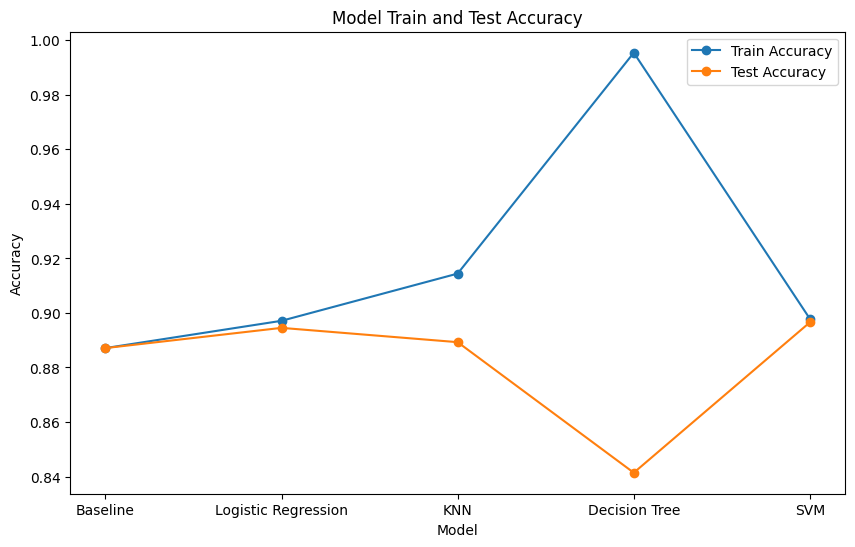

In [26]:
# Compare model perfomance using Train test accuracy line charts
plt.figure(figsize=(10, 6))
plt.plot(results_df['Model'], results_df['Train Accuracy'], marker='o', label='Train Accuracy')
plt.plot(results_df['Model'], results_df['Test Accuracy'], marker='o', label='Test Accuracy')
plt.title('Model Train and Test Accuracy')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.legend()
plt.show()




### Visualize model accuracies using grouped bar chart.

                 Model         Dataset  Accuracy
0             Baseline  Train Accuracy  0.887119
1  Logistic Regression  Train Accuracy  0.897122
2                  KNN  Train Accuracy  0.914441
3        Decision Tree  Train Accuracy  0.995436
4                  SVM  Train Accuracy  0.897834
5             Baseline   Test Accuracy  0.887119
6  Logistic Regression   Test Accuracy  0.894532
7                  KNN   Test Accuracy  0.889288
8        Decision Tree   Test Accuracy  0.841410
9                  SVM   Test Accuracy  0.896572


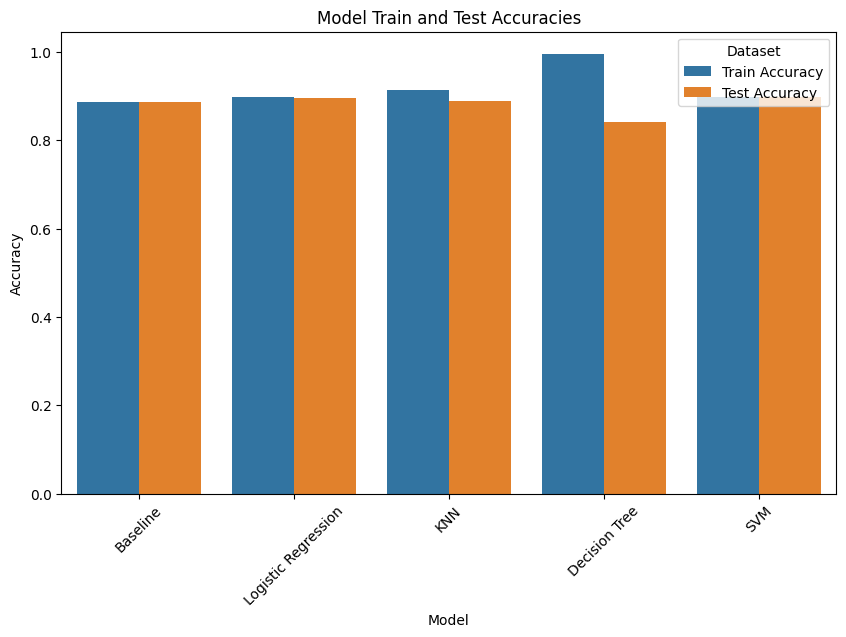

In [27]:
# Melt the DataFrame to create a long-form dataset
melted_df = results_df.melt(id_vars=['Model'], value_vars=['Train Accuracy', 'Test Accuracy'],
                            var_name='Dataset', value_name='Accuracy')
print(melted_df)

# Create the grouped bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=melted_df, x='Model', y='Accuracy', hue='Dataset')
plt.title('Model Train and Test Accuracies')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.legend(title='Dataset')
plt.show()

### Visualize model accuracies using heatmap bar chart.

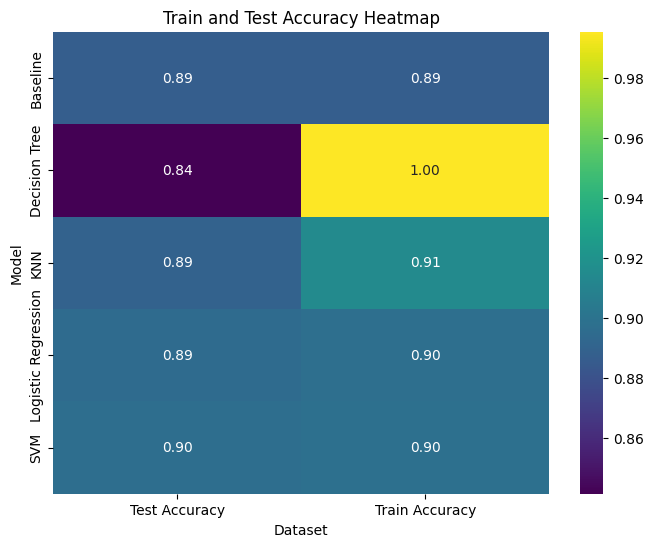

In [28]:

# Pivot the DataFrame to create a matrix for the heatmap
heatmap_data = melted_df.pivot(index='Model', columns=['Dataset'], values='Accuracy')

plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_data, annot=True, cmap='viridis', fmt=".2f")
plt.title('Train and Test Accuracy Heatmap')
plt.xlabel('Dataset')
plt.ylabel('Model')
plt.show()

### 10.2 Compare fit times

* **Decision Tree and Logistic Regression:** These models demonstrated the most efficient training times, with Decision Tree being the fastest.
* **KNN:** While not as fast as the top two, KNN still exhibited a reasonably fast training time.
* **SVM:** In contrast, SVM had a considerably longer training time compared to the other models.

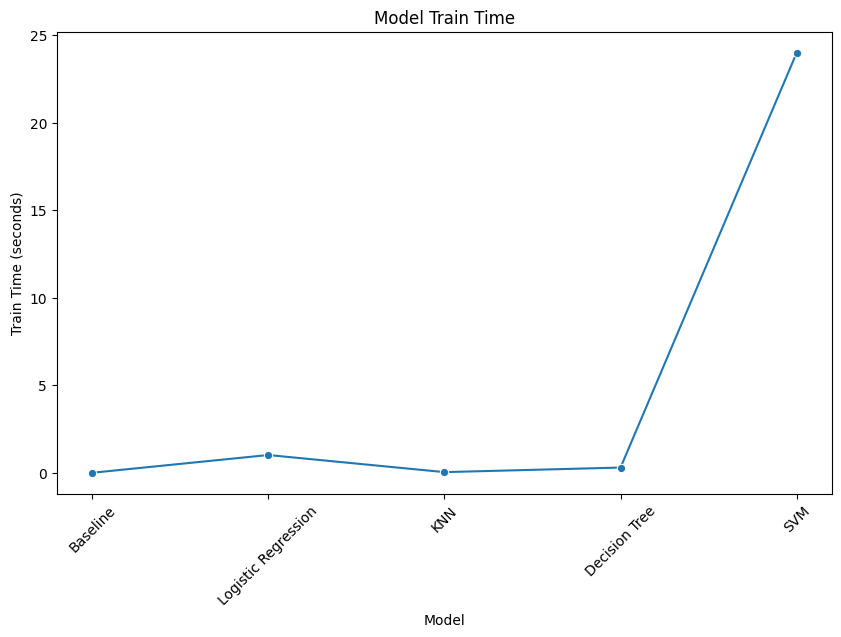

In [29]:
 # Compare train fit times usig line chart
plt.figure(figsize=(10, 6))
sns.lineplot(data=results_df, x='Model', y='Train Time', marker='o')
plt.title('Model Train Time')
plt.xlabel('Model')
plt.ylabel('Train Time (seconds)')
plt.xticks(rotation=45)
plt.show()

### 10.3 Line chart for train time and model name


Text(0, 0.5, 'Accuracy')

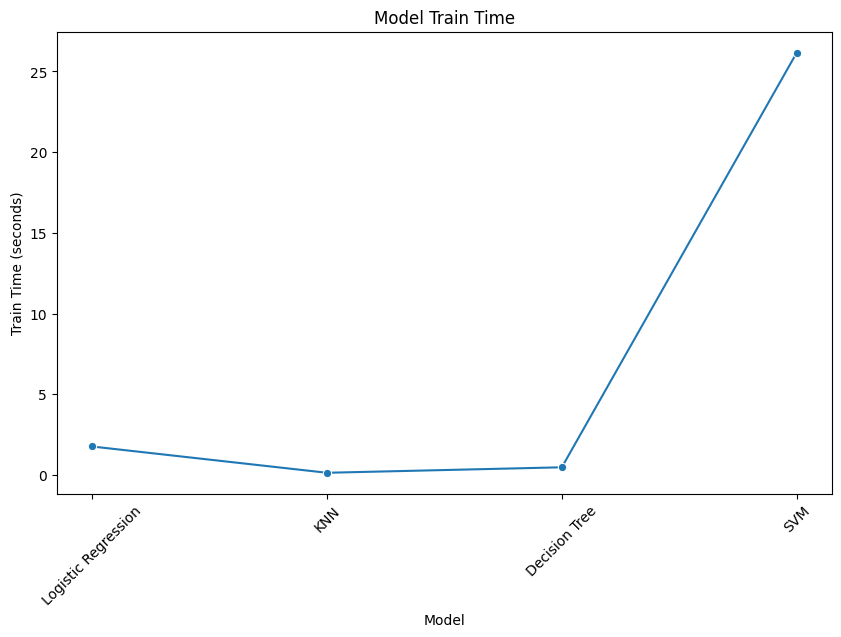

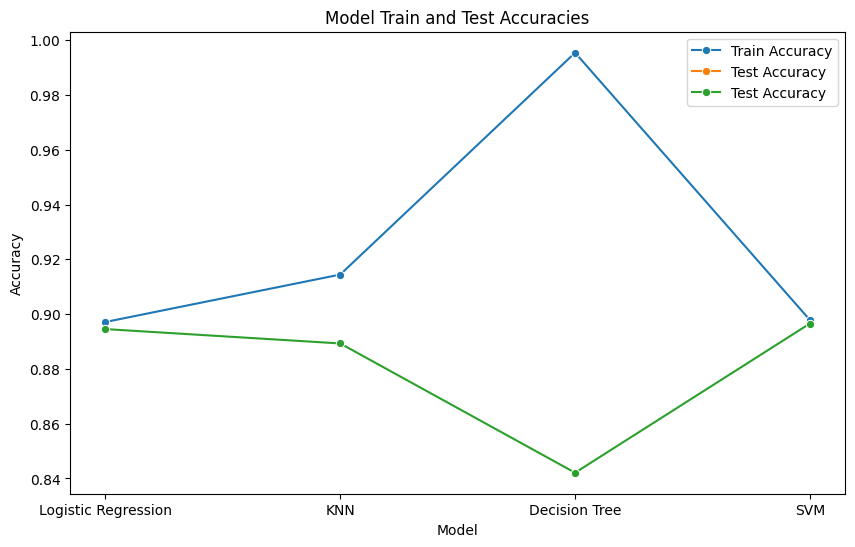

In [32]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=results_df, x='Model', y='Train Time', marker='o')
plt.title('Model Train Time')
plt.xlabel('Model')
plt.ylabel('Train Time (seconds)')
plt.xticks(rotation=45)



# draw a line chart comparing train and test accuracies
plt.figure(figsize=(10, 6))
sns.lineplot(data=results_df, x='Model', y='Train Accuracy', marker='o', label='Train Accuracy')
# Add a line for Baseline Model

sns.lineplot(data=results_df[results_df['Model'] == 'Baseline'], x='Model', y='Test Accuracy', marker='o', label='Test Accuracy')

sns.lineplot(data=results_df, x='Model', y='Test Accuracy', marker='o', label='Test Accuracy')
plt.title('Model Train and Test Accuracies')
plt.xlabel('Model')
plt.ylabel('Accuracy')

### Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.

- More feature engineering and exploration.  For example, should we keep the gender feature?  Why or why not?
- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

In [38]:
# Scale the values.
# scale training and test data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

improved_results = []

## 11.1 Improve Logistic Regression

Use various techniques such as RFE, SMOTE, Lasso to improve the Logistic Regression model.

### 11.1.1 Improve Logistic Regression using RFE


Best number of features: 20
{'Model': 'Logistic Regression RFE', 'Train Time': 240.73604607582092, 'Train Accuracy': 0.899970865300573, 'Test Accuracy': 0.8988054773234923}


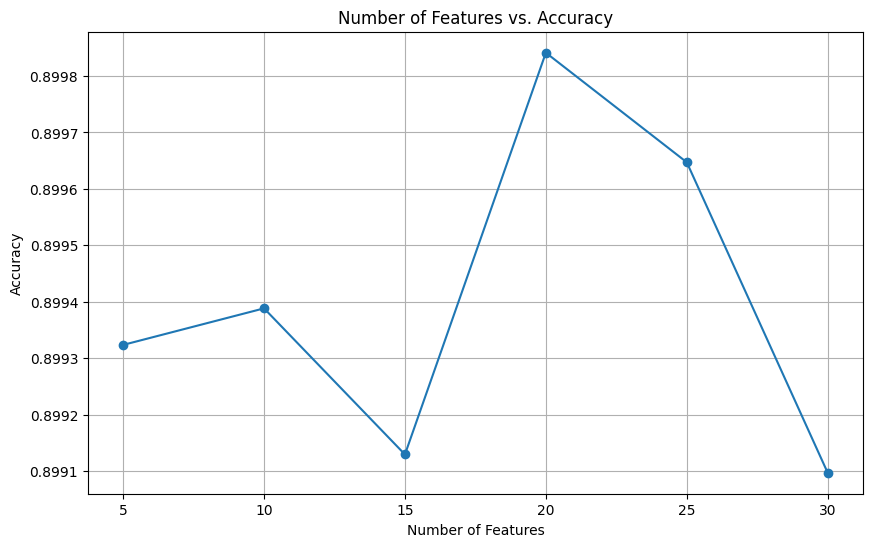

In [41]:
# Recursive Feature Elimination (RFE):

# Recursively remove features and build a model with the remaining features.
# Evaluate the model's performance at each step and select the feature set that gives the best results.

start_time = time.time()
# LR model
model = LogisticRegression()

# Create the RFE object and specify the number of features to select
rfe = RFE(estimator=model)

# Parameter for GridSearchCV
param_grid = {'n_features_to_select': [5, 10, 15, 20, 25, 30]}

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=rfe, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

end_time = time.time()


best_n_features = grid_search.best_params_['n_features_to_select']
print(f"Best number of features: {best_n_features}")
best_model = grid_search.best_estimator_

lr_results = {'Model': 'Logistic Regression RFE', 'Train Time': end_time - start_time,
              'Train Accuracy': accuracy_score(y_train, best_model.predict(X_train_scaled)),
              'Test Accuracy' : accuracy_score(y_test, best_model.predict(X_test_scaled))}
print(lr_results)
improved_results.append(lr_results)


# Visualize num features and score
plt.figure(figsize=(10, 6))
plt.plot(grid_search.cv_results_['param_n_features_to_select'],
         grid_search.cv_results_['mean_test_score'], marker='o')
plt.title('Number of Features vs. Accuracy')
plt.xlabel('Number of Features')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()#

### 11.1.2 Improve Logistic Regressin using SMOTE. For more info check this [link](https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html)




In [42]:
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)
start_time = time.time()
model = LogisticRegression()
model.fit(X_train_resampled, y_train_resampled)
end_time = time.time()

accuracy = accuracy_score(y_test, model.predict(X_test_scaled))
print(f"Accuracy: {accuracy}")

lr_smote_results = {'Model': 'Logistic Regression SMOTE', 'Train Time': end_time - start_time,
              'Train Accuracy': accuracy_score(y_train, model.predict(X_train_scaled)),
              'Test Accuracy' : accuracy_score(y_test, model.predict(X_test_scaled))}
print(lr_smote_results)
improved_results.append(lr_smote_results)


Accuracy: 0.8175196659221132
{'Model': 'Logistic Regression SMOTE', 'Train Time': 2.8093061447143555, 'Train Accuracy': 0.8220193583891748, 'Test Accuracy': 0.8175196659221132}


### 11.1.3 Improve Logistic Regressin using SMOTE and GridSearchCV  with k neighbors and C values.

In [43]:
# Use GridSearchCV with SMOTE
# Create SMOTE object
from imblearn.pipeline import Pipeline as Pipeline_imblearn
from imblearn.over_sampling import SMOTE

start_time = time.time()
smote = SMOTE(random_state=42)

# Create pipeline with SMOTE and model
pipeline = Pipeline_imblearn([('smote', smote), ('model', LogisticRegression())])

# Define parameter grid for tuning
param_grid = {
    'smote__k_neighbors': [3, 5, 7],
    'model__C': [0.1, 1, 10]
}

# Create GridSearchCV object
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='f1')

# Fit to resampled training data
grid_search.fit(X_train_scaled, y_train)

end_time = time.time()

# Evaluate best model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_scaled)

# Evaluate using appropriate metric
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

lr_smote_grid_results = {'Model': 'Logistic Regression SMOTE Grid', 'Train Time': end_time - start_time,
              'Train Accuracy': accuracy_score(y_train, best_model.predict(X_train_scaled)),
              'Test Accuracy' : accuracy_score(y_test, best_model.predict(X_test_scaled))}
print(lr_smote_grid_results)
improved_results.append(lr_smote_grid_results)

Accuracy: 0.8178110129163834
{'Model': 'Logistic Regression SMOTE Grid', 'Train Time': 66.87633037567139, 'Train Accuracy': 0.8220193583891748, 'Test Accuracy': 0.8178110129163834}


### 11.1.4 Use  Lasso Regularization with LogisticRegression.

In [44]:
# Use Lasso Lasso Regularization
start_time = time.time()
model = LogisticRegression(penalty='l1', solver='liblinear')
model.fit(X_train_scaled, y_train)

end_time = time.time()
# Get accuracy and feature names.
accuracy = model.score(X_test_scaled, y_test)
print(f"Test Accuracy: {accuracy}")

accuracy = model.score(X_train_scaled, y_train)
print(f"Train Accuracy: {accuracy}")

lr_lasso = {'Model': 'Logistic Regression Lasso', 'Train Time': end_time - start_time,
              'Train Accuracy': accuracy_score(y_train, model.predict(X_train_scaled)),
              'Test Accuracy' : accuracy_score(y_test, model.predict(X_test_scaled))}
print(lr_lasso)
improved_results.append(lr_lasso)
# get coefficients
coefficients = model.coef_

# print coefficients and column names
for coef, feature in sorted(zip(coefficients[0], X_train.columns),
                            key=lambda x: abs(x[0]), reverse=True)[0:20]:
     if abs(round(coef, 2)) != 0:
       print(f"Coefficient for {feature}: {coef}")

Test Accuracy: 0.9001650966300865
Train Accuracy: 0.9002945841830954
{'Model': 'Logistic Regression Lasso', 'Train Time': 11.561707973480225, 'Train Accuracy': 0.9002945841830954, 'Test Accuracy': 0.9001650966300865}
Coefficient for emp.var.rate: -2.2950764710733504
Coefficient for cons.price.idx: 1.1718818851044814
Coefficient for nr.employed: 0.4580745645996445
Coefficient for contact_telephone: -0.3684878625784205
Coefficient for euribor3m: 0.36555566575710213
Coefficient for pdays: -0.22512916050180612
Coefficient for month_may: -0.21702043018732953
Coefficient for month_jun: -0.20522772981433055
Coefficient for month_mar: 0.16825608243683887
Coefficient for poutcome_nonexistent: 0.16799239929086396
Coefficient for month_nov: -0.15637805676610578
Coefficient for campaign: -0.14058642969659427
Coefficient for cons.conf.idx: 0.13768953516854354
Coefficient for month_aug: 0.136274118920313
Coefficient for poutcome_success: 0.12277913819545203
Coefficient for default_unknown: -0.099986

### 11.1.5 Try logistic regression with Polynomial Features of degree 2.

In [46]:
start_time = time.time()
mode_lr_poly = LogisticRegression()
pipeline = Pipeline([('poly', PolynomialFeatures(degree=2)), ('lr', mode_lr_poly)])
pipeline.fit(X_train_scaled, y_train)
end_time = time.time()
# Evaluate the model's performance (e.g., accuracy)
accuracy = pipeline.score(X_test_scaled, y_test)
print(f"Model Test Accuracy: {accuracy}")
accuracy = pipeline.score(X_train_scaled, y_train)
print(f"Model Train Accuracy: {accuracy}")
mode_lr_poly_results = {'Model': 'Logistic Regression Poly', 'Train Time': end_time - start_time,
              'Train Accuracy': accuracy_score(y_train, pipeline.predict(X_train_scaled)),
              'Test Accuracy' : accuracy_score(y_test, pipeline.predict(X_test_scaled))}
print(mode_lr_poly_results)
improved_results.append(mode_lr_poly_results)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model Test Accuracy: 0.8959891230455472
Model Train Accuracy: 0.9090673658994529
{'Model': 'Logistic Regression Poly', 'Train Time': 10.70002269744873, 'Train Accuracy': 0.9090673658994529, 'Test Accuracy': 0.8959891230455472}


### 11.2 Improve KNN Model

Use GridSearchCV to find the n neighbors

In [47]:
start_time = time.time()
knn = KNeighborsClassifier()
knn.fit(X_train_scaled, y_train)
grid_params = {'n_neighbors': list(range(1, 31))}
grid_search = GridSearchCV(knn, grid_params, cv=5)
grid_search.fit(X_train_scaled, y_train)
end_time = time.time()

# find best n
best_n_neighbors = grid_search.best_params_['n_neighbors']
print(f"Best number of neighbors: {best_n_neighbors}")

# Score for best n
accuracy = grid_search.best_estimator_.score(X_test_scaled, y_test)
print(f"Test Accuracy: {accuracy}")

knn_best_n = {'Model': 'KNN Best N', 'Train Time': end_time - start_time,
              'Train Accuracy': accuracy_score(y_train, grid_search.best_estimator_.predict(X_train_scaled)),
              'Test Accuracy' : accuracy_score(y_test, grid_search.best_estimator_.predict(X_test_scaled))}
print(knn_best_n)
improved_results.append(knn_best_n)

Best number of neighbors: 27
Test Accuracy: 0.8978343206759251
{'Model': 'KNN Best N', 'Train Time': 216.0603711605072, 'Train Accuracy': 0.901589459713185, 'Test Accuracy': 0.8978343206759251}


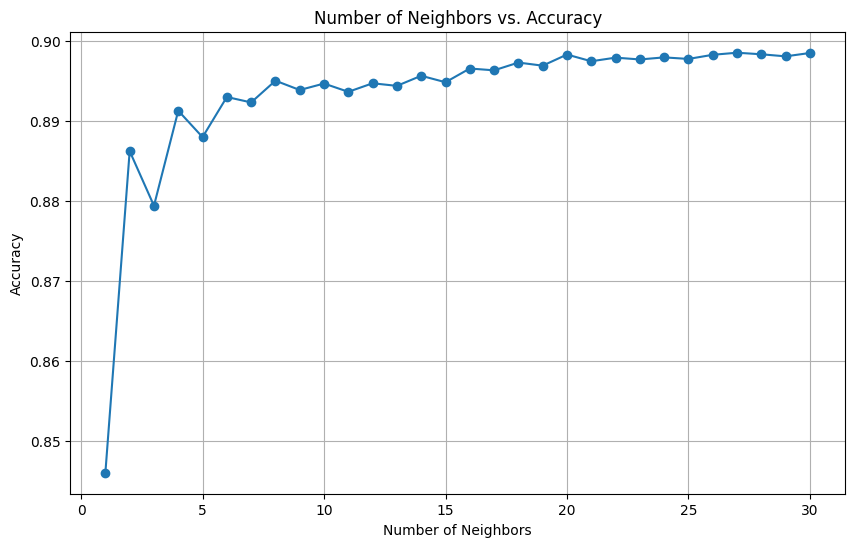

In [48]:
# Visualize knn n neighbors in multi dimension
plt.figure(figsize=(10, 6))
plt.plot(grid_search.cv_results_['param_n_neighbors'],
         grid_search.cv_results_['mean_test_score'], marker='o')
plt.title('Number of Neighbors vs. Accuracy')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

### 11.3 Improve Decision Tree model

Find the best max depth and min samples split and pre-pruning (min_samples_leaf)

In [49]:
start_time = time.time()
dt = DecisionTreeClassifier()
param_grid = {'max_depth': [None, 10, 20, 30, 40, 50],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4]}
grid_search = GridSearchCV(dt, param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)
end_time = time.time()

# find best n
best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}")

# Score for best n
accuracy = grid_search.best_estimator_.score(X_test_scaled, y_test)
print(f"Test Accuracy: {accuracy}")

dt_best = {'Model': 'Decision Tree Best Params', 'Train Time': end_time - start_time,
           'Train Accuracy': accuracy_score(y_train, grid_search.best_estimator_.predict(X_train_scaled)),
           'Test Accuracy' : accuracy_score(y_test, grid_search.best_estimator_.predict(X_test_scaled))}
print(dt_best)
improved_results.append(dt_best)
best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}")

Best Parameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 5}
Test Accuracy: 0.8946295037389531
{'Model': 'Decision Tree Best Params', 'Train Time': 67.92740321159363, 'Train Accuracy': 0.9131462238192354, 'Test Accuracy': 0.8946295037389531}
Best Parameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 5}


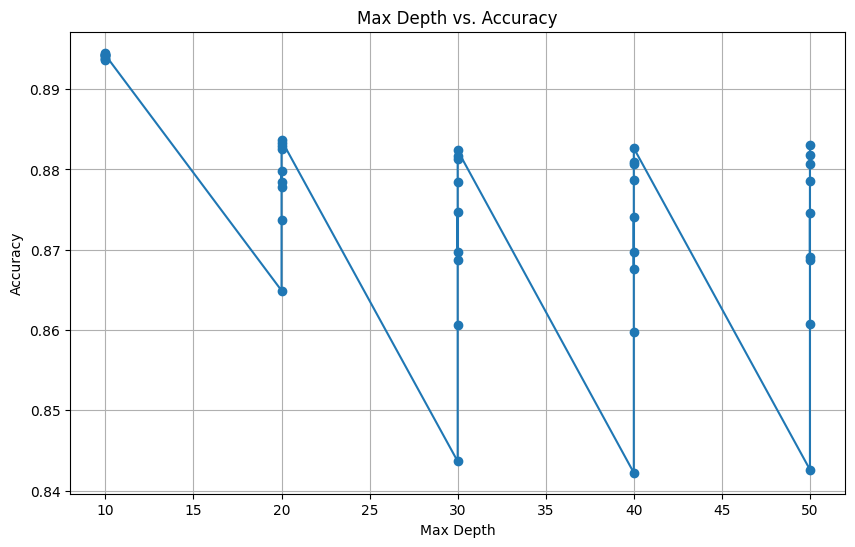

In [50]:
# visualize DT with best parameters
plt.figure(figsize=(10, 6))
plt.plot(grid_search.cv_results_['param_max_depth'],
         grid_search.cv_results_['mean_test_score'], marker='o')
plt.title('Max Depth vs. Accuracy')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

### 11.4 Improve SVM

* C, default=1.0
Regularization parameter. The strength of the regularization is inversely proportional to C. Must be strictly positive. The penalty is a squared l2 penalty.

* kernel {‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’} or callable, default=’rbf’
Specifies the kernel type to be used in the algorithm. If none is given, ‘rbf’ will be used.



In [51]:
# Create SVM model
start_time = time.time()
svm = SVC()
param_grid = {'C': [0.1], 'kernel': ['linear', 'rbf', 'poly', 'sigmoid']}
grid_search = GridSearchCV(svm, param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)
end_time = time.time()

# find best n
best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}")

# Score for best n
accuracy = grid_search.best_estimator_.score(X_test_scaled, y_test)
print(f"Test Accuracy: {accuracy}")
svm_best = {'Model': 'SVM Best Params', 'Train Time': end_time - start_time,
           'Train Accuracy': accuracy_score(y_train, grid_search.best_estimator_.predict(X_train_scaled)),
           'Test Accuracy' : accuracy_score(y_test, grid_search.best_estimator_.predict(X_test_scaled))}
print(svm_best)
improved_results.append(svm_best)
# SVM accuracy
print(f"Test Accuracy: {accuracy}")

Best Parameters: {'C': 0.1, 'kernel': 'poly'}
Test Accuracy: 0.8997766339710596
{'Model': 'SVM Best Params', 'Train Time': 1600.4920780658722, 'Train Accuracy': 0.9062186397332557, 'Test Accuracy': 0.8997766339710596}
Test Accuracy: 0.8997766339710596


### 12. Compare accuracy scores of improved models.

In [64]:
improved_results_df = pd.DataFrame(improved_results)
improved_results_df

,Model,Train Time,Train Accuracy,Test Accuracy
0,Logistic Regression RFE,240.736046,0.899971,0.898805
1,Logistic Regression SMOTE,2.809306,0.822019,0.817520
2,Logistic Regression SMOTE Grid,66.876330,0.822019,0.817811
3,Logistic Regression Lasso,11.561708,0.900295,0.900165
4,Logistic Regression Poly,10.700023,0.909067,0.895989
5,KNN Best N,216.060371,0.901589,0.897834
6,Decision Tree Best Params,67.927403,0.913146,0.894630
7,SVM Best Params,1600.492078,0.906219,0.899777


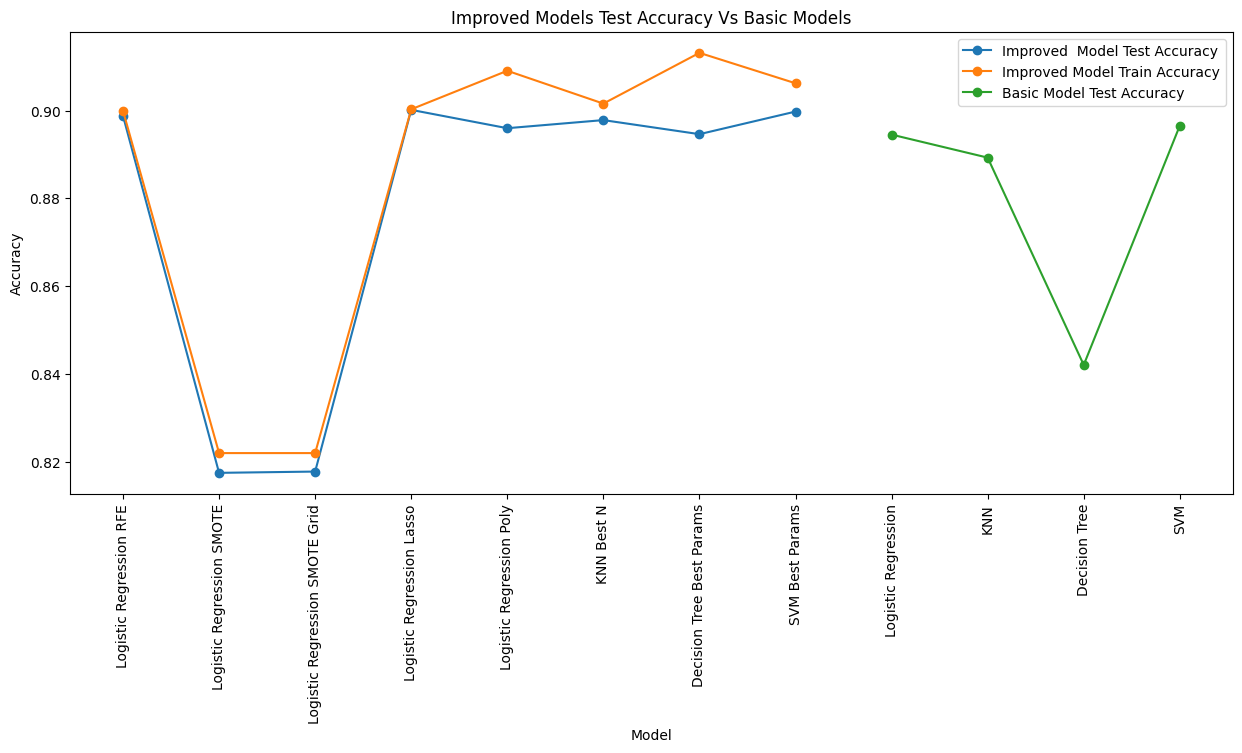

In [77]:
# Line chart for train test accuracies.
improved_results_df = pd.DataFrame(improved_results)
improved_results_df
# create line chart

plt.figure(figsize=(15, 6))
# rotate label.
plt.plot(improved_results_df['Model'], improved_results_df['Test Accuracy'], marker='o', label='Improved  Model Test Accuracy')
plt.plot(improved_results_df['Model'], improved_results_df['Train Accuracy'], marker='o', label='Improved Model Train Accuracy')
plt.plot(results_df['Model'], results_df['Test Accuracy'], marker='o', label='Basic Model Test Accuracy')
plt.xticks(rotation=90)
plt.title('Improved Models Test Accuracy Vs Basic Models')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

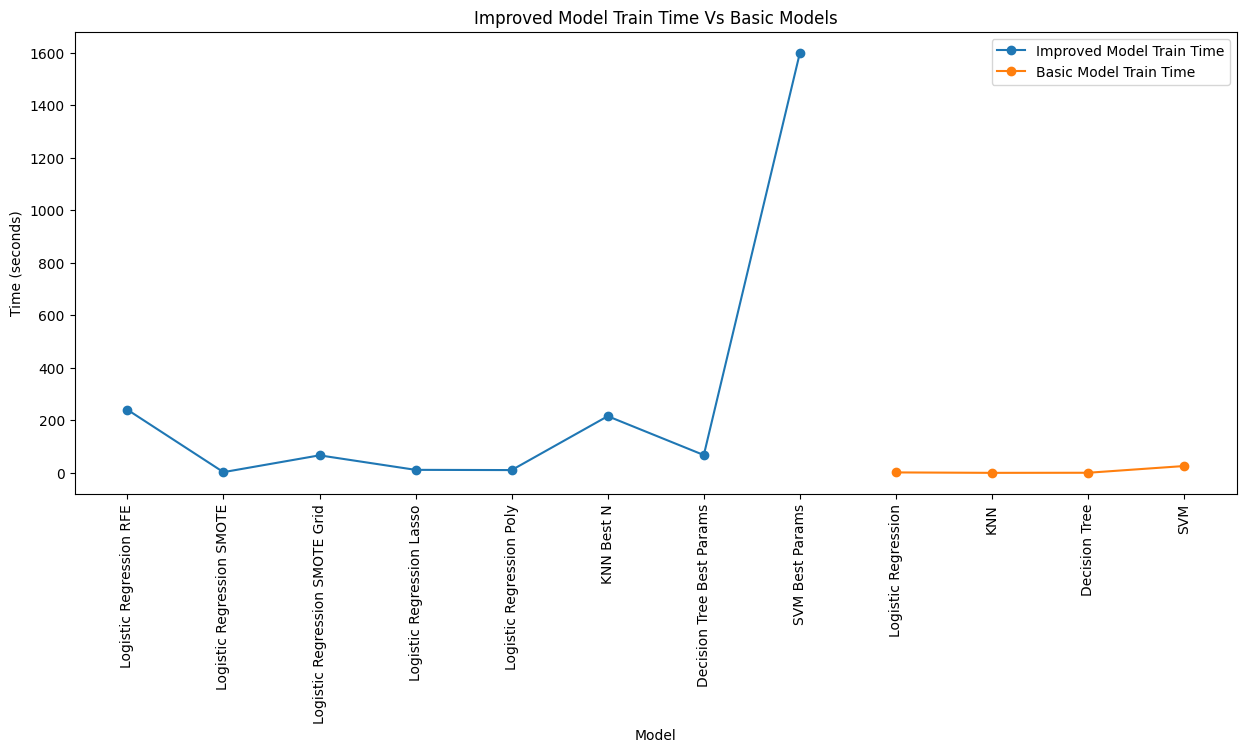

In [76]:
# Draw chart for comparing model time
plt.figure(figsize=(15, 6))
plt.plot(improved_results_df['Model'], improved_results_df['Train Time'], marker='o', label='Improved Model Train Time')
plt.plot(results_df['Model'], results_df['Train Time'], marker='o', label='Basic Model Train Time')
plt.xticks(rotation=90)
plt.title('Improved Model Train Time Vs Basic Models')
plt.xlabel('Model')
plt.ylabel('Time (seconds)')
plt.legend()
plt.show()